In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
import time
#from IPython import display

In [2]:
#x = np.linspace(-2*np.pi, 2*np.pi, 1000)  # 100 evenly-spaced values from 0 to 50
#y = (x**4) - (x**2) + 0.1*(x)
#y = x**4 + 0.1*np.sin(3*(x-0.5*np.pi))
#y = 0.05*x**4 + (1+np.cos(3*x)) + (1+np.cos(2*x)) + 3*(1+np.cos(1*x)) -1*x
x = np.array([-3.141592654, -2.988344654, -2.835096654, -2.681848654, -2.528600654, -2.375352654, -2.222104654, -2.068856654, -1.915608654, -1.762360654, -1.609112654, -1.455864654, -1.302616654, -1.149368654, -0.996120654, -0.842872654, -0.689624654, -0.536376654, -0.383128654, -0.229880654, -0.076632654, 0.076615346, 0.229863346, 0.383111346, 0.536359346, 0.689607346, 0.842855346, 0.996103346, 1.149351346, 1.302599346, 1.455847346, 1.609095346, 1.762343346, 1.915591346, 2.068839346, 2.222087346, 2.375335346, 2.528583346, 2.681831346, 2.835079346, 2.988327346])
#y = np.array([20.000, 10.000, 6.000, 2.000, 1.000, 0.700, 0.400, 0.200, 0.100, 0.050, 0.000, 0.050, 0.100, 0.200, 0.500, 1.000, 2.000, 3.000, 5.000, 6.000, 6.500, 7.000, 7.200, 7.300, 7.200, 7.100, 7.000, 6.000, 5.500, 5.200, 5.000, 5.050, 5.100, 5.300, 5.700, 6.000, 6.800, 8.000, 12.000, 16.000, 20.000])
#y = np.array([20.000, 12.000, 6.000, 2.500, 1.000, 0.700, 0.400, 0.200, 0.100, 0.050, 0.000, 0.050, 0.100, 0.200, 0.500, 0.800, 1.200, 1.800, 2.500, 4.000, 6.000, 7.000, 6.970, 6.930, 6.870, 6.800, 6.550, 6.400, 5.800, 5.200, 5.000, 5.050, 5.100, 5.300, 5.700, 6.000, 6.800, 8.000, 12.000, 16.000, 20.000])
#y = np.array([20.000,12.000,6.000,2.500,0.800,0.000,0.000,0.000,0.000,0.400,1.000,1.600,1.700,1.600,1.300,1.200,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.200,2.200,3.700,6.000,9.000,12.000,16.000,20.000])
#y = np.array([20.000,12.000,6.000,2.500,0.800,0.000,0.000,0.000,0.000,0.800,3.000,3.600,3.700,3.600,3.200,1.200,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.200,2.200,3.700,6.000,9.000,12.000,16.000,20.000])
#y = np.array([20.000,12.000,6.000,2.500,0.800,0.000,0.000,0.000,0.000,0.800,3.000,3.600,3.700,3.800,4.015,4.530,4.856,4.995,4.945,4.708,4.283,3.670,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,4.000,6.000,9.000,12.000,16.000,20.000])
#y = np.array([20.000,12.000,6.000,2.500,0.800,0.000,0.000,0.000,0.000,0.800,3.000,4.300,5.000,5.600,6.100,6.500,6.800,7.100,7.200,7.100,6.400,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,6.000,9.000,12.000,16.000,20.000])
#y = np.array([20.000,12.000,6.000,2.500,0.800,0.000,0.000,0.000,0.000,0.800,3.700,7.800,12.000,16.000,16.500,16.000,14.000,11.000,9.000,7.500,6.400,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,6.000,9.000,12.000,16.000,20.000])
#y = np.array([20.000,12.000,6.000,2.500,0.800,0.000,0.000,0.000,0.000,8.000,16.000,8.000,5.500,5.200,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,6.000,9.000,12.000,16.000,20.000])

#y = np.array([20.000,12.000,6.000,2.500,0.800,0.000,0.000,0.000,1.000,4.000,5.000,4.000,3.000,2.200,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,4.000,9.000,12.000,16.000,20.000])
y = np.array([20.000,12.000,6.000,2.500,0.800,0.000,0.000,0.000,1.000,5.500,7.700,5.500,2.300,2.200,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,4.000,9.000,12.000,16.000,20.000])

In [3]:
p0 = np.ones([41], np.float64)

def PotFunc(x,*p):
    fsum = 0.0
    for i in range((len(p)-1)/2):
        fsum += p[i]*(1+np.cos(i*x-p[i+((len(p)-1)/2)]))
    fsum += p[-1]*(x**4) # Landscape walls
    return fsum

def RestEne(x,fcn,eql):
    return fcn*(x - (eql))**2

popt, pcov = curve_fit(PotFunc,x,y,p0)
xfull = np.linspace(-2*np.pi, 2*np.pi, 1000)
yfit = PotFunc(xfull,*popt)
rfit = RestEne(xfull,100.0,-1.1)
yrfit = yfit + RestEne(xfull,100.0,-1.1)

<IPython.core.display.Javascript object>


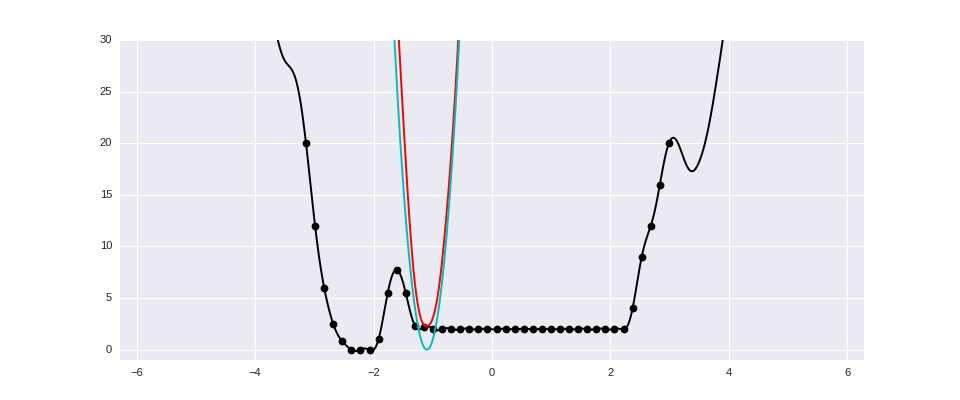

0.669649778864
0.546904396186 0.122745382678
-0.885268350874


In [4]:
plt.figure(figsize=(12,5))
plt.xlim(-2*np.pi,2*np.pi)
plt.ylim(-1,30)
plt.plot(x, y, 'ko')
plt.plot(xfull, yfit,'k-')
plt.plot(xfull, yrfit,'r-')
plt.plot(xfull, rfit, 'c-')

xint = np.linspace(-3.141592654,3.141592654,10000)
yint = np.exp(-(1/(1.987204118e-3*298.15))*PotFunc(xint,*popt))
partfunc = np.trapz(yint,xint)

print partfunc

xint = np.linspace(-3.141592654,-1.609112654,10000)
yint = np.exp(-(1/(1.987204118e-3*298.15))*PotFunc(xint,*popt))
boundfunc = np.trapz(yint,xint)

print boundfunc, partfunc-boundfunc

print -1.987204118e-3*298.15*np.log(boundfunc/(partfunc-boundfunc))



In [5]:
def RunMC(pos=0.0,Cyc=500,Temp=298.15,Step=0.1,fcn=0.0,eql=0.0,Interactive=False,Wall=False):
    R = 1.987204118e-3
    B = 1/(R*Temp)
    AllPos = np.zeros([Cyc], np.float64)
    AllEne = np.zeros([Cyc], np.float64)
    ene = PotFunc(pos,*popt) + fcn*(pos - (eql))**2
    for i in range(Cyc):
        npos = np.random.normal(pos,Step)
        nene = PotFunc(npos,*popt) + fcn*(npos - (eql))**2
        if Wall == True:
            if eql < -1.609112654 and npos > -1.609112654:
                nene += 20.0*(npos - (-1.609112654))**2
            elif eql > -1.609112654 and npos < -1.609112654:
                nene += 20.0*(npos - (-1.609112654))**2
            else:
                next
        if (nene < ene):
            pos = npos
            ene = nene
        else:
            rand = np.random.random()
            exch = np.exp(-B*(nene-ene))
            if (exch > rand):
                pos = npos
                ene = nene
        AllPos[i] = pos # The pos should be added to the trajectory each step, even if it doesn't move, right?
        AllEne[i] = ene 
        if i == 0:
            ax.plot(AllPos[:i],AllEne[:i], 'ro-', zorder=3, markeredgecolor='none', alpha=0.1)
        elif Interactive:
            ax.lines[-1].set_xdata(AllPos[:i])
            ax.lines[-1].set_ydata(AllEne[:i])
            title = "Cycle = %.0f" % (i)
            ax.set_title(title)
            fig.canvas.draw()
            time.sleep(0.0001)
        else:
            next
    return i+1,AllPos,AllEne

<IPython.core.display.Javascript object>


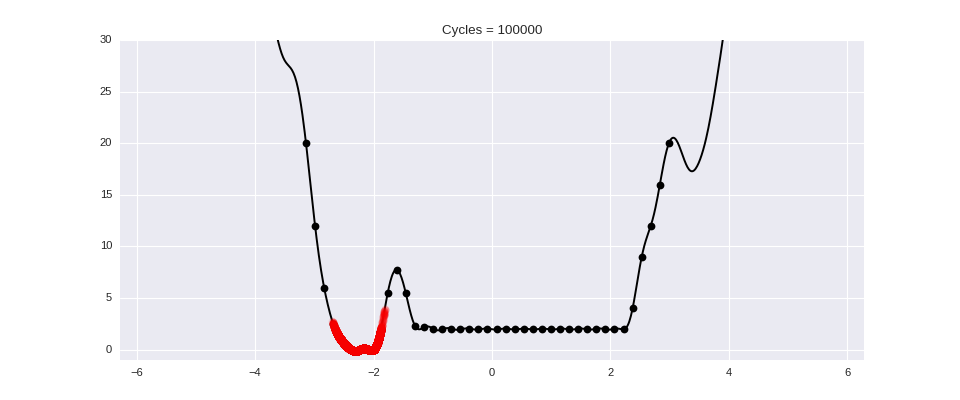

In [6]:
fig,ax = plt.subplots(figsize=(12,5))
ax.set_xlim(-2*np.pi,2*np.pi)
ax.set_ylim(-1,30)
ax.plot(x,y,'ko', zorder=1)
ax.plot(xfull,yfit,'k-', zorder=2)

Cyc,AllPos,AllEne = RunMC(Cyc=100000,pos=-2.0,fcn=0.0,eql=-2.0,Step=0.01,Interactive=False,Wall=False)
title = "Cycles = %.0f" % (Cyc)
ax.lines[-1].set_xdata(AllPos[:Cyc])
ax.lines[-1].set_ydata(AllEne[:Cyc])
ax.set_title(title)
fig.canvas.draw()

bound=unbound=0
for i in range(Cyc):
    if AllPos[i] < -1.609112654:
        bound += 1
    else:
        unbound += 1

#print bound,unbound,-1.987204118e-3*298.15*np.log(float(bound)/float(unbound))

In [7]:
### Functions
def factors(n):   # Return list of integer factors
  facs=[]
  sqrt=int(round(np.sqrt(n)+0.5))
  i = 1
  while i <= sqrt:
    if n % i == 0:
      facs.append(i)
      j=n/i
      if j != i:
        facs.append(j)
    i += 1
  return sorted(facs, key=int)

def nearestmax(n):  # Nearest number that is 100 less than input and divisible by two
  int=[]
  numfac=[]
  maxfac=0
  if n % 2 == 0:
    low=n-100
    high=n
  else:
    low=n-101
    high=n-1
  if low < 0:
    low = 0
  for i in range(low,high+2,2):
    numfac = len(factors(i))
    if numfac >= maxfac:
      maxfac = numfac
      mostfac = i
  return mostfac

def seom(N,arr):
  Facs=[]
  Facs=factors(N)
  Bn=np.zeros([len(Facs)], np.int32) # Number of blocks for a given block size
  Bmean=np.zeros([Facs[-1]], np.float64)
  SEOM=np.zeros([len(Facs)-2],np.float64)
  for i in range(len(Facs)-2):   # Run over all block sizes except the final two: two blocks, one block.
    for j in range(Facs[-i-1]):  # Run over all blocks in the data for a specific size.
      Bmean[j]=np.mean(arr[j*Facs[i]:(j+1)*Facs[i]])
    Bn[i]=j+1
    SEOM[i]=np.std(Bmean[0:Bn[i]],ddof=0)/np.sqrt(Bn[i]-1) # or ddof=1? I think 0, see Flyvbjerg
    #print Facs[i],SEOM[i],SEOM[i]/np.sqrt(2*(Bn[i]-1))  # Blocksize, SEOM, Error of SEOM (see equation 28 in Flyvbjerg, JCP, 1989)
  hist,edges = np.histogram(SEOM,range=[np.min(SEOM),np.max(SEOM)],bins=50,)  ### edges = len(hist)+1
  return np.max(SEOM),edges[np.argmax(hist)+1]  # Assume the blocking plateau corresponds to the max histogram count!

def newseom(arr):
  Nblk = nearestmax(arr.size)
  Facs=[]
  Facs=factors(Nblk)
  Bn=np.zeros([len(Facs)], np.int32) # Number of blocks for a given block size
  Bmean=np.zeros([Facs[-1]], np.float64)
  SEOM=np.zeros([len(Facs)-2],np.float64)
  for i in range(len(Facs)-2):   # Run over all block sizes except the final two: two blocks, one block.
    for j in range(Facs[-i-1]):  # Run over all blocks in the data for a specific size.
      Bmean[j]=np.mean(arr[j*Facs[i]:(j+1)*Facs[i]])
    Bn[i]=j+1
    SEOM[i]=np.std(Bmean[0:Bn[i]],ddof=0)/np.sqrt(Bn[i]-1) # or ddof=1? I think 0, see Flyvbjerg
    #print Facs[i],SEOM[i],SEOM[i]/np.sqrt(2*(Bn[i]-1))  # Blocksize, SEOM, Error of SEOM (see equation 28 in Flyvbjerg, JCP, 1989)
  #hist,edges = np.histogram(SEOM,range=[np.min(SEOM),np.max(SEOM)],bins=50,)  ### edges = len(hist)+1
  #return np.max(SEOM),edges[np.argmax(hist)+1]  # Assume the blocking plateau corresponds to the max histogram count!
  return np.max(SEOM),Nblk

In [8]:
#Nblk = nearestmax(AllPos.size)
#print seom(Nblk,AllPos)
print np.mean(AllPos),newseom(AllPos)
print np.var(AllPos[0:nearestmax(AllPos.size)])

-2.2428858446 (0.020291541984203507, 99960)
0.0279167161112


<IPython.core.display.Javascript object>


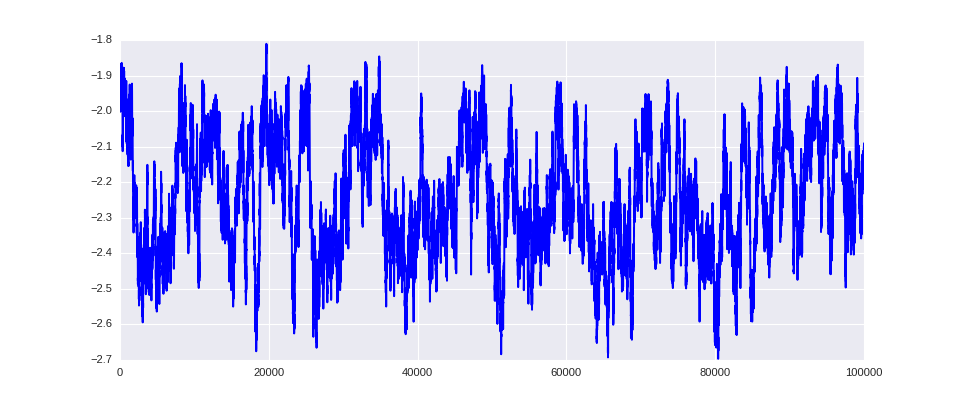

100000 100000


In [9]:
plt.figure(figsize=(12,5))
Steps = np.arange(0,Cyc)
print len(Steps),len(AllPos)
plt.plot(Steps,AllPos,'b-')


<IPython.core.display.Javascript object>


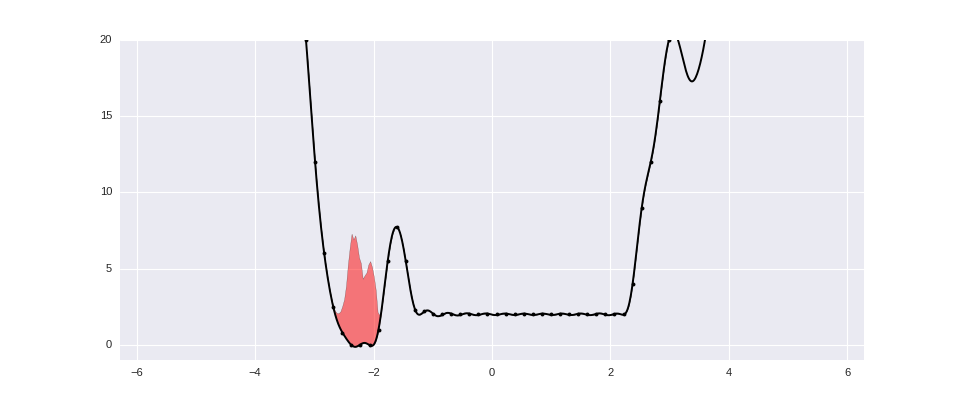

In [10]:
plt.figure(figsize=(12,5))
plt.xlim(-2*np.pi,2*np.pi)
plt.ylim(-1,20)
plt.plot(x, y, 'k.')
plt.plot(xfull, yfit,'k-')
hist,bins = np.histogram(AllPos, bins=200, range=(-np.pi,np.pi))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
y2=PotFunc(center,*popt)
y3=(100.0*hist.astype(float)/float(Cyc))+y2
plt.fill_between(center,y2,y3,facecolor='r',edgecolor='k',alpha=0.5)


In [11]:
fcns = [0.00,0.40,0.80,1.60,2.40,4.00,5.50,8.65,11.80,18.10,24.40,37.00,49.60,74.80,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,74.80,49.60,37.00,24.40,18.10,11.80,8.65,5.50,4.00,2.40,1.60,0.80,0.40,0.00]
eqls = [-2.2,-2.2,-2.2,-2.2,-2.2,-2.2,-2.2,-2.2,-2.2,-2.2,-2.2,-2.2,-2.2,-2.2,-2.2,-2.0,-1.8,-1.6,-1.4,-1.2,-1.0,-0.8,-0.6,-0.4,-0.2,-0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4]
#a 0 15
#u 15 33
#r 33 47
Cyc=10000
N = len(fcns)
Traj = np.zeros([N,Cyc], np.float64)
U = np.zeros([N,N,Cyc], np.float64) # traj, hamiltonian, cyc
Nk = np.zeros([N], np.int32)
for i,fcn in enumerate(fcns):
    eql = eqls[i]
    if i == 0 or i == len(fcns)-1:
        cyc,Traj[i],ene = RunMC(pos=eql,Cyc=Cyc,Temp=298.15,Step=0.1,fcn=50*fcn/100.0,eql=eql,Interactive=False,Wall=True)
    else:
        cyc,Traj[i],ene = RunMC(pos=eql,Cyc=Cyc,Temp=298.15,Step=0.1,fcn=50*fcn/100.0,eql=eql,Interactive=False)
    for n in range(N):
        U[i,n] = RestEne(Traj[i],fcns[n],eqls[n])
    Nk[i] = Cyc


<IPython.core.display.Javascript object>


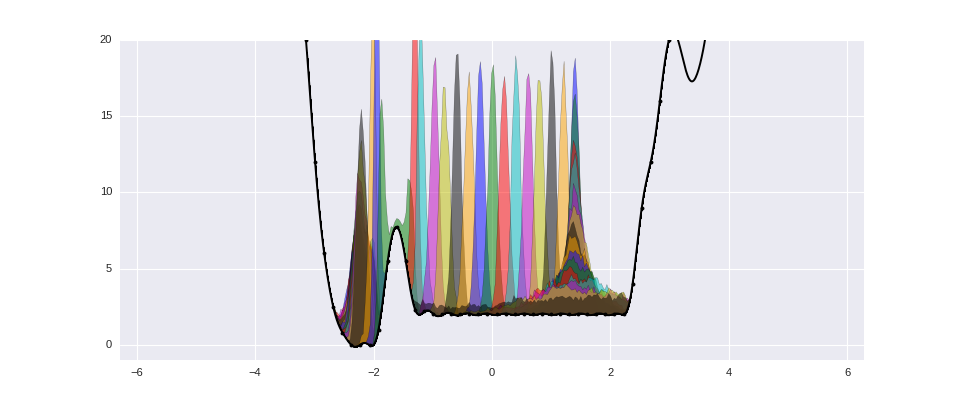

10000 0


In [12]:
plt.close(fig)
plt.figure(figsize=(12,5))
plt.xlim(-2*np.pi,2*np.pi)
plt.ylim(-1,20)
plt.plot(x, y, 'k.')
plt.plot(xfull, yfit,'k-')
colors = ['b','g','r','c','m','y','k','orange']
plt.hold(True)
#for i in [0,-1]:
for i in range(N):
    hist,bins = np.histogram(Traj[i], bins=200, range=(-np.pi,np.pi))
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    y2=PotFunc(center,*popt)
    y3=(100.0*hist.astype(float)/float(Cyc))+y2
    plt.fill_between(center,y2,y3,facecolor=colors[i%len(colors)],edgecolor='k',alpha=0.5)

bound=unbound=0
for i in range(Cyc):
    if Traj[0,i] < -1.609112654:
        bound += 1
    else:
        unbound += 1

print bound,unbound

In [15]:
import sys
sys.path.append('/home/henrikse/data_kirkwood/software/pymbar-2.0beta/pymbar')
#print(sys.path)
import pymbar

In [16]:
#a 0 15
#u 15 33
#r 33 47
Ni=33
Nj=47
mbar = pymbar.MBAR(U[Ni:Nj,Ni:Nj], Nk[Ni:Nj], verbose = True, method = 'adaptive', initialize = 'BAR')
Ovr = mbar.computeOverlap()
print "\nPrinting Overlap Matrix"
print "%6s" % ('#'),
for i in range(Nj-Ni):
    print "%6s" % (i),
print ''
for i in range(Nj-Ni):
    print "%6s" % (i),
    for j in range(Nj-Ni):
        print "%6.4f" % (Ovr[i,j]),
    print ''
print "\nCalculate Free Energy Differences Between States"
[Deltaf, dDeltaf] = mbar.getFreeEnergyDifferences()
print  "Free Energy Differences (in units of kcal/mol)"
h=0
for i in range(Ni,Nj):
    print "%3.0f %10.5f %10.5f %10.5f %10.5f" % (i,fcns[i],eqls[i],Deltaf[0,h]/(298.15*1.987204118e-3),dDeltaf[0,h]/(298.15*1.987204118e-3))
    h += 1

Could not import working embedded C++ helper code -- using pure Python version instead.
K = 14, L = 14, N_max = 10000, total samples = 140000
There are 14 states with samples.
N_k = 
[10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000
 10000 10000]
Initial dimensionless free energies with method BAR
f_k = 
[ 0.         -0.23087027 -0.38991093 -0.62014138 -0.80267002 -1.06549721
 -1.24643375 -1.50563581 -1.67782626 -1.93811406 -2.13257654 -2.46601849
 -2.78772798 -3.33733169]
Determining dimensionless free energies by Newton-Raphson iteration.
self consistent iteration gradient norm is 1.9336e+05, Newton-Raphson gradient norm is     485.97
Choosing self-consistent iteration on iteration 0
current f_k for states with samples =
[ 0.         -0.21320352 -0.36825203 -0.59320414 -0.75762989 -0.99630641
 -1.17091404 -1.42492595 -1.59984757 -1.8661184  -2.06270961 -2.37802187
 -2.67051222 -3.26584437]
relative max_delta = 3.589141e-02
self consistent iteration gradient nor

In [17]:
print 2.01+6.52-5.11, np.sqrt(0.01**2 + 0.19**2 + 0.02**2)

3.42 0.191311264697
